In [64]:
labelTrain.str <- rep('non-driver', length(labelTrain))
labelTrain.str[labelTrain] <- 'driver'

In [65]:
rfCV <- runCV(predictorRF, labelTrain.str, variantTrain.corr,  nfolds=5, nrepeats=5, positiveClass="driver") 
save(rfCV, file='../../../data/rfCV.RData')

[1] "start CV"
[1] "none"
.........................

In [41]:
eroc <- evaluateCVwithROCR(rfCV, measure="tpr")

In [63]:
#head(rfCV[[1]]$proba)

In [68]:
names(rfCV[[1]])

[1] "proba" "ref"

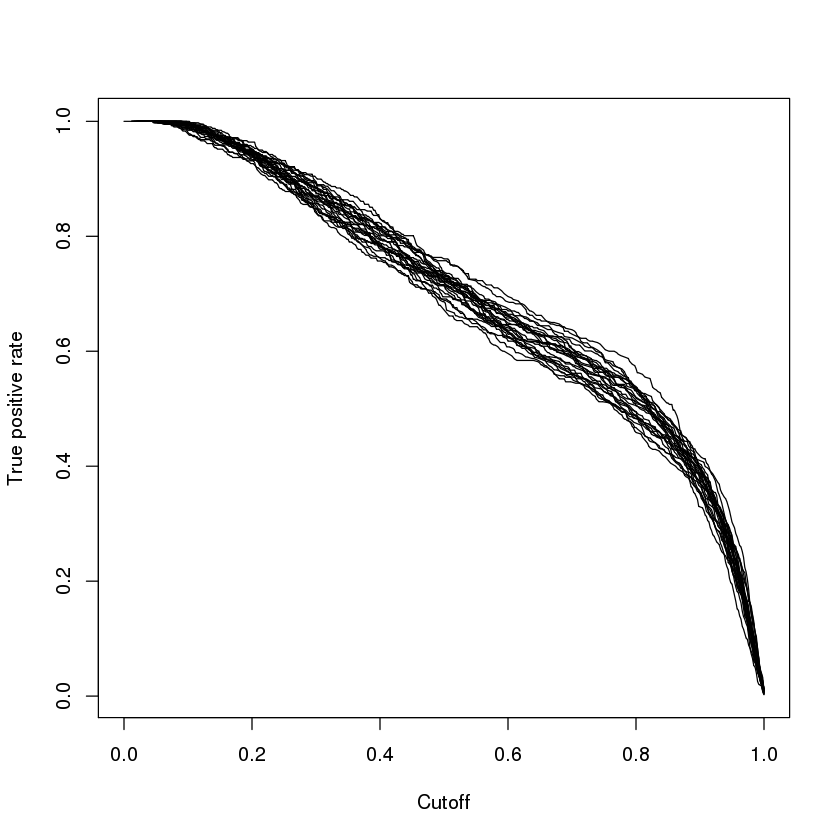

In [69]:
plot(eroc)

In [52]:
myrf <- randomForest(variantTrain.corr, factor(labelTrain.str), ntree = 500)

In [70]:
summary(myrf)

                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted       4000   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes           8000   matrix numeric  
oob.times       4000   -none- numeric  
classes            2   -none- character
importance        11   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               4000   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     

In [71]:
names(myrf)

[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"

In [56]:
summary(myrf$forest)

           Length  Class  Mode   
ndbigtree      500 -none- numeric
nodestatus  660500 -none- numeric
bestvar     660500 -none- numeric
treemap    1321000 -none- numeric
nodepred    660500 -none- numeric
xbestsplit  660500 -none- numeric
pid              2 -none- numeric
cutoff           2 -none- numeric
ncat            11 -none- numeric
maxcat           1 -none- numeric
nrnodes          1 -none- numeric
ntree            1 -none- numeric
nclass           1 -none- numeric
xlevels         11 -none- list   

In [58]:
(VI_F=importance(myrf))

,MeanDecreaseGini
Consequence,81.44981
cgType,30.60672
t_vaf,216.33239
t_alt_count,324.21853
n_depth,222.32503
t_ref_plus_count,212.56972
t_ref_neg_count,221.01109
SIFT_score,103.47092
Kaviar_AF,326.59550
cosmicCount,74.91997
